# Is Fandango still inflating ratings?

### Determining whether Fandango is still rounding up actual ratings of the movies in last 2 years

In Otober 2015, It was proven that Fandango movie site was rounding up movie ratings up to the next half star. After this discovery, they claimed that it was due to a bug which caused rounding. In this project, we will analyze whether they're still inflating the ratings in more recent movies.

In [2]:
import pandas as pd
fandango = pd.read_csv("fandango_score_comparison.csv")
fandango.shape                  

(146, 22)

In [3]:
fandango1617 = pd.read_csv("movie_ratings_16_17.csv")
fandango1617.shape

(214, 15)

In [4]:
columns = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
fandango = fandango[columns]
fandango.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [5]:
columns_16_17 = ['movie', 'year', 'fandango']
fandango1617 = fandango1617[columns_16_17]
fandango1617.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


 #### Sample is not random;
-movie selection criteria depends on conditions such as release date and minimum ratings, so not each movie is sampled with same probability.
#### Sample is not representative;
-because of the selection conditions, our sample is not representative of the population of all movie ratings in Fandango regardless of the release year 

### Changing the goal

To have our sample to be representative, we change our goal into investigating whether there is a change in Fandango ratings of popular movies, before and after Mickey's analysis in 2015. Comparing the ratings of 2015 and 2016 is a good point.

In [6]:
sum(fandango["Fandango_votes"] < 30)

0

All movies are popular in previous table.

In [7]:
fandango1617.sample(10,random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


For the second table, we make a random sampling, we check the Fandango website for the number of fan ratings. (Our table doesn't give this data) We find that %90 of movies above are popular. At least 8 out of 10 is good for representability.

In [8]:
fandango16 = fandango1617[fandango1617["year"] == 2016]
fandango16.shape

(191, 3)

In [9]:
fandango15 = fandango[fandango["FILM"].str.contains("(2015)")]
fandango15.shape

C:\Users\Asus_Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


(129, 5)

## Comparing distribution shapes for 2015 and 2016

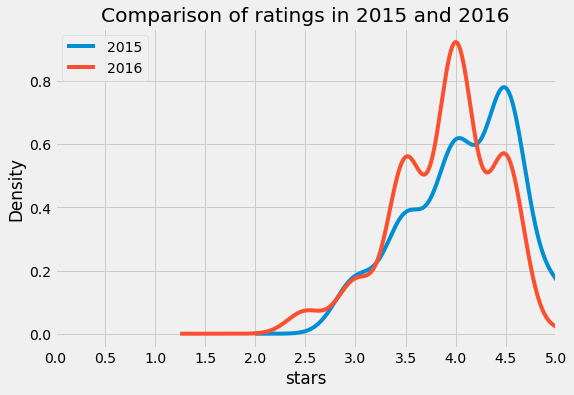

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
fandango15["Fandango_Stars"].plot.kde(label ="2015", legend=True, figsize=(8,5.5))
fandango16["fandango"].plot.kde(label="2016",legend=True)
plt.title("Comparison of ratings in 2015 and 2016")
plt.xlabel("stars")
plt.xlim(0,5)
plt.xticks(np.arange(0,5.5,0.5))
plt.show()



### Conclusion from rating comparison
As seen from the table above, clearly there's a peak at every 0.5 after 3.0 rating, so we can reckon that rounding up is still going on with Fandango ratings. However, there's a catch. While at 2015 ratings tend to be higher,which populates around 4.5, at 2016 they tend to populate around 4.0. It means that, in 2016 movies are rated lower than 2015.

In [40]:
fandango15["Fandango_Stars"].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [41]:
fandango16["fandango"].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

The samples have different number of movies. That's why it doesn't make sense to compare with absolute frequencies. Relative frequencies would give better results. By using bar charts or pie charts, we can see the decline of proportions for every 0.5  rating. For example, while there is a significant number of movies rated 5 stars in 2015, only a small minority received 5 stars in 2016. Moreover, there's a clear decline in proportion of 4.5 starred movies from 2015 to 2016.

### Determining the direction of the change

In [57]:
mean_2015 = (fandango15["Fandango_Stars"].mean())
median_2015 = (fandango15["Fandango_Stars"].median())
mode_2015 = (fandango15["Fandango_Stars"].mode())[0]

mean_2016 = (fandango16["fandango"].mean())
median_2016 = (fandango16["fandango"].median())
mode_2016 = (fandango16["fandango"].mode())[0]


In [59]:
summary = pd.DataFrame()

summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ["mean","median","mode"]
summary


,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


There is a slight decline in ratings from 2015 to 2016.

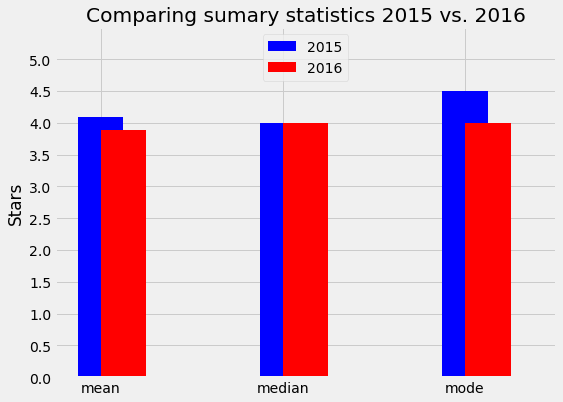

In [92]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = 'blue', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = 'red', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,6))
plt.title("Comparing sumary statistics 2015 vs. 2016")
plt.ylabel("Stars")
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,0.5))
plt.legend(loc = "upper center")
plt.show()

Grouped bar plot confirm what we saw earlier. There's definiltely a slight decrease in ratings of popular movies from 2015 to 2016. Most probably, it is caused by fixing the biased rating system which was discorered in 2015 by Hickey's analysis. 